# Import the Data 

In [1]:
import pandas as pd
bank = pd.read_csv('bank.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [3]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Preprocessing Data

In [4]:
import numpy as np
bank=bank.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), 
                  (1,2,3,4,5,6,7,8,9,10,11,12))
bank=bank.replace(('yes','no'),(1,0))
bank=bank.replace(('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',
              'technician','unemployed','unknown'),(1,2,3,4,5,6,7,8,9,10,11,0))
bank=bank.replace(('divorced','married','single','unknown'),(1,2,3,0))
bank=bank.replace(('unknown','secondary','primary','tertiary'),(0,1,2,3))
bank=bank.replace(('unknown','telephone','cellular'),(0,1,2))
bank=bank.replace(('other','failure','success'),(0,1,2))

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,2,0,1787,0,0,2,19,10,79,1,-1,0,0,0
1,33,8,2,1,0,4789,1,1,2,11,5,220,1,339,4,1,0
2,35,5,3,3,0,1350,1,0,2,16,4,185,1,330,1,1,0
3,30,5,2,3,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,2,2,1,0,0,1,0,0,5,5,226,1,-1,0,0,0
5,35,5,3,3,0,747,0,0,2,23,2,141,2,176,3,1,0
6,36,7,2,3,0,307,1,0,2,14,5,341,1,330,2,0,0
7,39,10,2,1,0,147,1,0,2,6,5,151,2,-1,0,0,0
8,41,3,2,3,0,221,1,0,0,14,5,57,2,-1,0,0,0
9,43,8,2,2,0,-88,1,1,2,17,4,313,1,147,2,1,0


# Selecting Features and Outcome

In [6]:
X_population=bank.iloc[:,0:16].values
Y_population=bank.iloc[:,-1].values

# select features age and job
X_sample=X_population[:,[0,1]]
Y_sample=Y_population

# Dividing Test and Training Data

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, Y_sample, test_size = 0.3, random_state = 0)

print('Labels counts in Y_sample:', np.bincount(Y_sample))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in Y_sample: [4000  521]
Labels counts in y_train: [2810  354]
Labels counts in y_test: [1190  167]


C:\Users\yipan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Standardizing the Features

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\yipan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Plot Function 

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# Logistic Regression

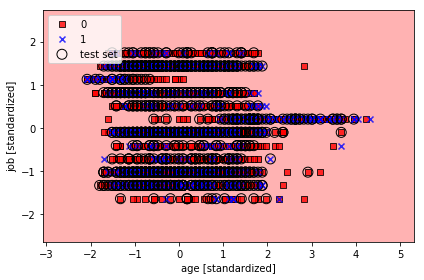

array([[0.90976425, 0.09023575],
       [0.9033226 , 0.0966774 ],
       [0.87970702, 0.12029298],
       [0.9055858 , 0.0944142 ],
       [0.90300883, 0.09699117]])

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000, random_state = 0)
lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=lr, 
                      test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('job [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

lr.predict_proba(X_test_std[:5, :])

In [11]:
y_pred = lr.predict(X_test_std)
print('Accuracy of Logistic Regression: %.6f' % accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.876934


# Suppory Vector Machine

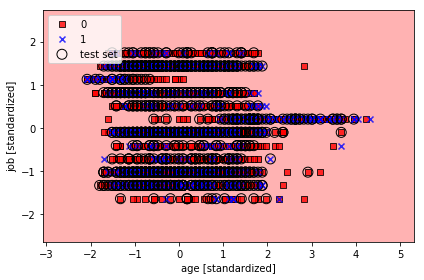

array([[0.90976425, 0.09023575],
       [0.9033226 , 0.0966774 ],
       [0.87970702, 0.12029298],
       [0.9055858 , 0.0944142 ],
       [0.90300883, 0.09699117]])

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('job [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

lr.predict_proba(X_test_std[:5, :])

In [13]:
y_pred = lr.predict(X_test_std)
print('Accuracy of SVM: %.6f' % accuracy_score(y_test, y_pred))

Accuracy of SVM: 0.876934


# Decision Tree Model

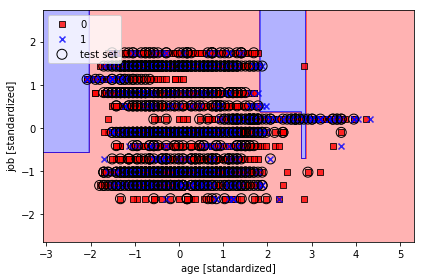

array([[0.90976425, 0.09023575],
       [0.9033226 , 0.0966774 ],
       [0.87970702, 0.12029298],
       [0.9055858 , 0.0944142 ],
       [0.90300883, 0.09699117]])

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=tree, test_idx=range(3164, 4521))

plt.xlabel('age [standardized]')
plt.ylabel('job [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

lr.predict_proba(X_test_std[:5, :])

In [15]:
y_pred = lr.predict(X_test_std)
print('Accuracy of DTM: %.6f' % accuracy_score(y_test, y_pred))

Accuracy of DTM: 0.876934
